# Read and Parse Chainer logs

In [25]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data

In [3]:
!ls *.log

V100_series_run.log
chainer_timings_K80_b128e1.log
chainer_timings_k80_b64e1.log
chainer_timings_mouse_b128e1.log
chainer_timings_mouse_b64e1.log
chainer_timings_mouse_b64e1_2.log
chainer_timings_mouse_convert_b128e1.log
chainer_timings_mouse_convert_b32e1.log
chainer_timings_mouse_convert_b64e1.log
chainer_timings_mouse_cuda_b64e1.log
chainer_timings_mouse_update_b64e1.log
cupy_logs064.log
cupy_logs128.log
deterministic-nondeterministic.log
mouse_series_run.log
series_batches_learnrate_mouse.log


## CIFAR100 runs with various batch sizes and learning rates

In [6]:
batch_learn_pattern = re.compile(r"^b\s+(\d+)\s+l\s+([0-9\.]+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [23]:
with open("series_batches_learnrate_mouse.log","r") as f:
    lines = f.readlines()
    batch = 0
    epoch = 0
    run = 0
    loss = 0
    acc = 0
    time = 0
    df = pd.DataFrame(data=None,columns=["batch","learn","loss","acc","time"])
    for line in lines:
        s = line.strip()
        m = batch_learn_pattern.match(s)        
        if m:
            batch = int(m.group(1))
            learn = float(m.group(2))            
            run += 1
            #print batch,learn
        else:
            m = output_pattern.match(s)
            if m:
                epoch = int(m.group(1))
                if epoch == 10:
                    loss = float(m.group(3))
                    acc = float(m.group(5))
                    time = float(m.group(6))
                    #print batch,learn,loss,acc,time
                    df.loc[run] = [batch,learn,loss,acc,time]
df

,batch,learn,loss,acc,time
1,64.0,0.10,3.07477,0.207703,902.167
2,64.0,0.05,2.94562,0.232783,903.532
3,64.0,0.01,2.85907,0.265227,904.382
4,80.0,0.10,3.23924,0.180000,913.751
5,80.0,0.05,2.86602,0.245100,914.092
6,80.0,0.01,3.18968,0.198000,915.333
7,128.0,0.10,3.40021,0.182160,880.543
8,128.0,0.05,2.87686,0.240111,880.944
9,128.0,0.01,3.95429,0.097607,880.751
10,256.0,0.10,3.27042,0.185254,489.041


In [37]:
loss_df = df[['batch','learn','loss']]
acc_df = df[['batch','learn','acc']]
time_df = df[['batch','learn','time']]
loss_df

,batch,learn,loss
1,64.0,0.10,3.07477
2,64.0,0.05,2.94562
3,64.0,0.01,2.85907
4,80.0,0.10,3.23924
5,80.0,0.05,2.86602
6,80.0,0.01,3.18968
7,128.0,0.10,3.40021
8,128.0,0.05,2.87686
9,128.0,0.01,3.95429
10,256.0,0.10,3.27042


In [60]:
loss_T = loss_df.pivot(index="batch",columns="learn",values="loss")
acc_T = acc_df.pivot(index="batch",columns="learn",values="acc")
time_T = time_df.pivot(index="batch",columns="learn",values="time")
loss_T

learn,0.01,0.05,0.1
batch,,,
64.0,2.85907,2.94562,3.07477
80.0,3.18968,2.86602,3.23924
128.0,3.95429,2.87686,3.40021
256.0,5.84185,3.16127,3.27042
384.0,5.23754,3.91368,3.93968
512.0,7.00561,5.08648,3.65834
640.0,6.20904,6.19542,3.74924


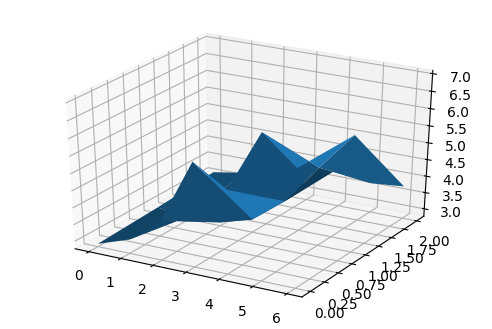

In [62]:
df = loss_T

Y = range(df.shape[0])
X = range(df.shape[1])
X, Y = np.meshgrid(X, Y)

threedee = plt.figure().gca(projection='3d')
threedee.plot_surface(Y, X, df)

plt.show()

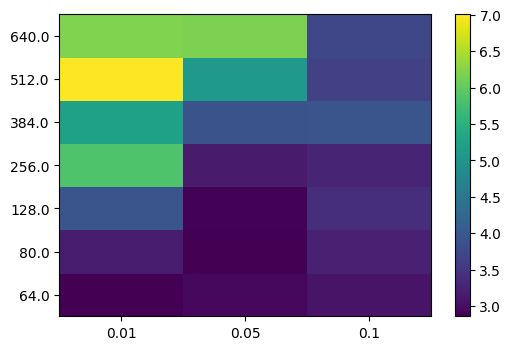

In [65]:
df = loss_T
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.colorbar()
plt.show()

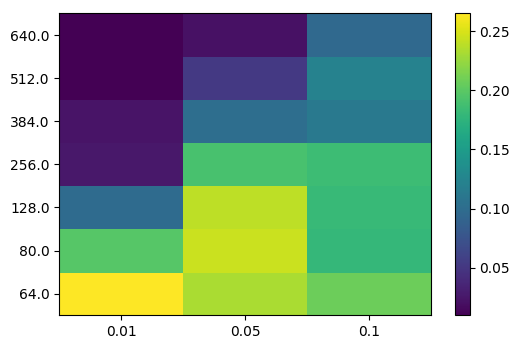

In [66]:
df = acc_T
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.colorbar()
plt.show()

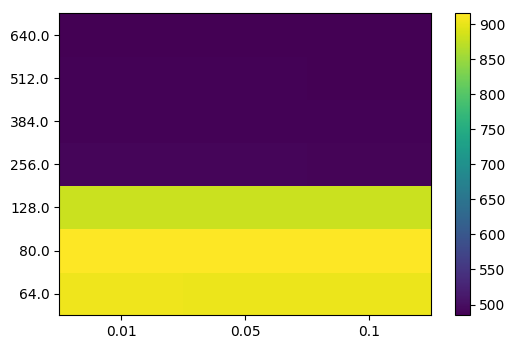

In [67]:
df = time_T
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.colorbar()
plt.show()